In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

In [2]:
hotel_data=pd.read_csv("Hotel_Reservations.csv")
hotel_data.drop("Booking_ID",axis=1,inplace=True)

In [3]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(hotel_data,test_size=0.2,stratify=hotel_data["booking_status"])

In [4]:
scaler=StandardScaler()
num_types=train_data.select_dtypes(include="number").columns
#num_types
train_data[num_types]=scaler.fit_transform(train_data[num_types])
test_data[num_types]=scaler.transform(test_data[num_types])

In [5]:
ordinal=OrdinalEncoder()
cat_types=train_data.select_dtypes(include="object").columns
cat_types=cat_types[:-1]
#cat_types
train_data[cat_types]=ordinal.fit_transform(train_data[cat_types])
test_data[cat_types]=ordinal.transform(test_data[cat_types])

In [6]:
label=LabelEncoder()
train_data["booking_status"]=label.fit_transform(train_data["booking_status"])
test_data["booking_status"]=label.transform(test_data["booking_status"])

In [7]:
train_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
26037,0.294502,-0.259707,0.217996,-0.144206,0.0,-0.181247,0.0,1.726220,0.465204,0.836320,-0.181387,3.0,-0.163436,-0.064223,-0.088999,-0.387115,-0.791086,0
26998,0.294502,-0.259707,-0.930558,-0.851229,0.0,-0.181247,0.0,-0.992015,0.465204,-0.465929,-0.868364,4.0,-0.163436,-0.064223,-0.088999,-0.871403,-0.791086,1
17369,0.294502,4.698638,4.812211,5.511978,0.0,-0.181247,5.0,-0.665360,0.465204,-1.768178,-1.669837,4.0,-0.163436,-0.064223,-0.088999,1.401578,-0.791086,0
3945,0.294502,-0.259707,-0.930558,-0.144206,3.0,-0.181247,0.0,-0.980348,-2.149596,0.510758,1.536056,4.0,-0.163436,-0.064223,-0.088999,-0.352788,-0.791086,1
2155,0.294502,-0.259707,1.366550,-1.558253,0.0,-0.181247,0.0,-0.992015,-2.149596,0.836320,-1.326349,4.0,-0.163436,-0.064223,-0.088999,0.642678,-0.791086,1


still need to remove outliers

<AxesSubplot: >

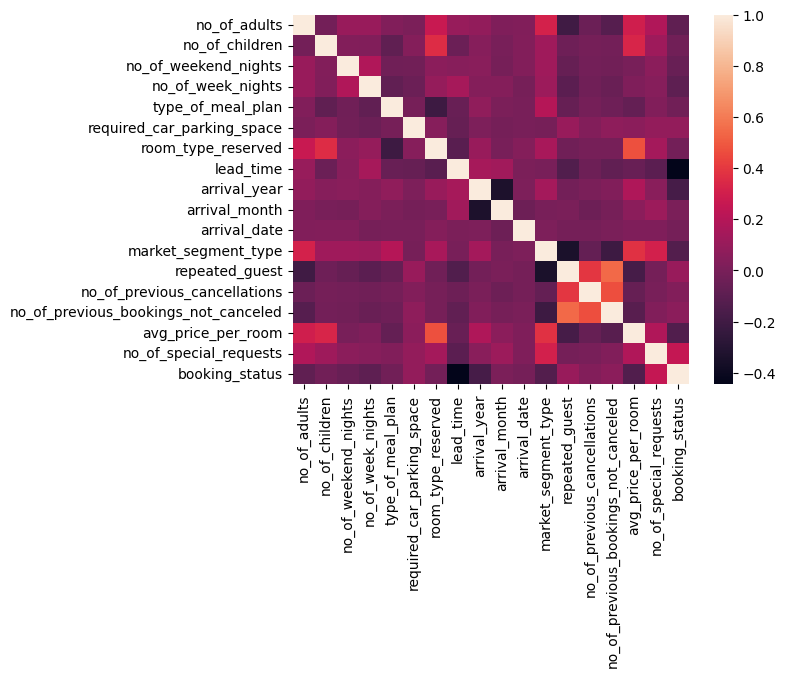

In [8]:
import seaborn as sns
corr=train_data.corr()
sns.heatmap(corr)

In [9]:
corr["booking_status"].sort_values(ascending=False)

booking_status                          1.000000
no_of_special_requests                  0.251660
repeated_guest                          0.107170
required_car_parking_space              0.087194
no_of_previous_bookings_not_canceled    0.061308
no_of_previous_cancellations            0.032495
arrival_month                           0.010932
arrival_date                           -0.012586
room_type_reserved                     -0.020383
no_of_children                         -0.026208
type_of_meal_plan                      -0.027081
no_of_weekend_nights                   -0.061103
no_of_adults                           -0.089928
no_of_week_nights                      -0.093369
market_segment_type                    -0.134954
avg_price_per_room                     -0.136740
arrival_year                           -0.177113
lead_time                              -0.446113
Name: booking_status, dtype: float64

In [10]:
from imblearn import over_sampling

over_sampler=over_sampling.RandomOverSampler()
x_res,y_res=over_sampler.fit_resample(train_data.iloc[:,:-1],train_data["booking_status"])

In [11]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(x_res,y_res)
pred=classifier.predict(test_data.iloc[:,:-1])
from sklearn.metrics import f1_score
f1_score(test_data["booking_status"],pred)

0.8271685052995891

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models=[GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for i in models:
    i.fit(x_res,y_res)
    pred=i.predict(test_data.iloc[:,:-1])
    print(i)
    print(f1_score(test_data["booking_status"],pred))
    print("")

GaussianNB()
0.28041958041958037

SVC()
0.8528554463996546

DecisionTreeClassifier()
0.904801153925407

RandomForestClassifier()
0.9294826002653332

